## Generating Questions and Answers for Interval Analysis

In [1]:
import ast

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../output_data/detailed_travel_routes.csv')

# Parse columns
df['Domain'] = df['Domain'].apply(lambda x: ast.literal_eval(x.replace('coordinates = ', '').strip()))
df['Plan'] = df['Plan'].apply(ast.literal_eval)
df['Detailed Plan'] = df['Detailed Plan'].apply(ast.literal_eval)

df

,id,Domain,Goal,Plan,Detailed Plan
0,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[[Drive north on Abbey Road., Turn left onto C...",[[{'instruction': 'Drive north on Abbey Road.'...
1,1,"[[-80.31080036, 26.01301541], [-80.21063654, 2...","MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[[Drive northwest., Turn left after 19 meters ...","[[{'instruction': 'Drive northwest.', 'name': ..."
2,2,"[[-98.57619951, 29.52010675], [-97.7136084, 30...","CLARITY CHILD GUIDANCE CENTER (SAN ANTONIO, TX...","[[Drive east., Turn left onto Tom Slick., Turn...","[[{'instruction': 'Drive east.', 'name': '-', ..."
3,3,"[[-81.4371032715, 28.2898006439], [-80.3951633...","Kissimmee Gateway Airport (ORLANDO, FL) to IND...","[[Drive east on Patrick Street., Turn left ont...",[[{'instruction': 'Drive east on Patrick Stree...
4,4,"[[-122.2488937, 38.11790375], [-122.8130035, 3...",ST. HELENA HOSPITAL CENTER FOR BEHAVIORAL HEAL...,"[[Drive north on Broadway Street., Turn left o...",[[{'instruction': 'Drive north on Broadway Str...
...,...,...,...,...,...
495,495,"[[-90.709503, 42.402], [-92.40029907226562, 42...","Dubuque Regional Airport (DUBUQUE, IA) to Wate...","[[Drive north., Bear right after 1129 meters o...","[[{'instruction': 'Drive north.', 'name': '-',..."
496,496,"[[-76.56655563780009, 42.9295192], [-76.106300...","Seward, William H., House (Auburn, NY) to Syra...","[[Drive north., Turn left onto South Street/NY...","[[{'instruction': 'Drive north.', 'name': '-',..."
497,497,"[[-71.06823934295548, 42.35671345], [-72.2428,...","Headquarters House (Boston, MA) to BAYSTATE MA...","[[Drive west on Beacon Street., Bear left towa...",[[{'instruction': 'Drive west on Beacon Street...
498,498,"[[-86.58465712669839, 34.73047047522626], [-87...","Milligan Block (Huntsville, AL) to Northwest A...","[[Drive northwest on East Side Square., Take t...",[[{'instruction': 'Drive northwest on East Sid...


#### Define question format

In [2]:
def format_question(row):
    assert row['Interval Indices'][0] != 0, "Error: Interval is the first step of the route"
    return f"What is the time interval between performing Step {row['Interval Indices'][0]} and Step {row['Interval Indices'][1] + 1}?"

In [3]:
# Get one plan per row
df = df.explode(['Plan', 'Detailed Plan']).reset_index(drop=True)

df

,id,Domain,Goal,Plan,Detailed Plan
0,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn left onto Cl...","[{'instruction': 'Drive north on Abbey Road.',..."
1,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn left onto Cl...","[{'instruction': 'Drive north on Abbey Road.',..."
2,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn right onto C...","[{'instruction': 'Drive north on Abbey Road.',..."
3,1,"[[-80.31080036, 26.01301541], [-80.21063654, 2...","MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[Drive northwest., Turn left after 19 meters o...","[{'instruction': 'Drive northwest.', 'name': '..."
4,1,"[[-80.31080036, 26.01301541], [-80.21063654, 2...","MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[Drive northwest., Turn left after 19 meters o...","[{'instruction': 'Drive northwest.', 'name': '..."
...,...,...,...,...,...
1495,498,"[[-86.58465712669839, 34.73047047522626], [-87...","Milligan Block (Huntsville, AL) to Northwest A...","[Drive northwest on East Side Square., Turn le...",[{'instruction': 'Drive northwest on East Side...
1496,498,"[[-86.58465712669839, 34.73047047522626], [-87...","Milligan Block (Huntsville, AL) to Northwest A...","[Drive northwest on East Side Square., Turn le...",[{'instruction': 'Drive northwest on East Side...
1497,499,"[[-73.126198, 41.163502], [-72.688066, 41.93851]]","Igor I Sikorsky Memorial Airport (BRIDGEPORT, ...","[Drive north on Great Meadow Road., Keep right...",[{'instruction': 'Drive north on Great Meadow ...
1498,499,"[[-73.126198, 41.163502], [-72.688066, 41.93851]]","Igor I Sikorsky Memorial Airport (BRIDGEPORT, ...","[Drive north on Great Meadow Road., Keep right...",[{'instruction': 'Drive north on Great Meadow ...


#### Find continuous intervals and total interval values

In [4]:
def find_continuous_intervals(row):
    interval_indices = []
    interval_values = []
    start_idx = None
    low = 0
    high = 0

    for step_idx in range(len(row['Plan'])):
        detailed_step = row['Detailed Plan'][step_idx]
        if not 'has_interval' in detailed_step:
            print(f"id: {row['id']}, step_idx: {step_idx}")
        if detailed_step['has_interval']:
            # Start of a new interval
            if start_idx is None:
                start_idx = step_idx 
            low += detailed_step['interval'][0]
            high += detailed_step['interval'][1]
        else:
            # End of current interval
            if start_idx is not None:
                interval_indices.append((start_idx, step_idx - 1)) 
                interval_values.append([low, high])
                start_idx = None

    # If an interval wasn't closed, but we're done with the plan
    if start_idx is not None:
        interval_indices.append((start_idx, len(row['Plan']) - 1))
        interval_values.append([low, high])

    return (interval_indices, interval_values)

df[['Interval Indices', 'Ground Truth']] = df.apply(find_continuous_intervals, axis=1, result_type='expand')

df

,id,Domain,Goal,Plan,Detailed Plan,Interval Indices,Ground Truth
0,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn left onto Cl...","[{'instruction': 'Drive north on Abbey Road.',...","[(14, 14)]","[[4, 5]]"
1,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn left onto Cl...","[{'instruction': 'Drive north on Abbey Road.',...","[(28, 28), (37, 37)]","[[847, 1035], [851, 1040]]"
2,0,"[[-71.22407723, 42.20650415], [-71.06341724278...",WESTWOOD/PEMBROKE HEALTH SYSTEM WESTWOOD (WEST...,"[Drive north on Abbey Road., Turn right onto C...","[{'instruction': 'Drive north on Abbey Road.',...","[(13, 13)]","[[484, 592]]"
3,1,"[[-80.31080036, 26.01301541], [-80.21063654, 2...","MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[Drive northwest., Turn left after 19 meters o...","[{'instruction': 'Drive northwest.', 'name': '...","[(1, 5), (20, 21)]","[[120, 147], [140, 172]]"
4,1,"[[-80.31080036, 26.01301541], [-80.21063654, 2...","MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[Drive northwest., Turn left after 19 meters o...","[{'instruction': 'Drive northwest.', 'name': '...","[(1, 5), (9, 10), (19, 20)]","[[120, 147], [484, 590], [523, 638]]"
...,...,...,...,...,...,...,...
1495,498,"[[-86.58465712669839, 34.73047047522626], [-87...","Milligan Block (Huntsville, AL) to Northwest A...","[Drive northwest on East Side Square., Turn le...",[{'instruction': 'Drive northwest on East Side...,"[(6, 6), (23, 23)]","[[44, 53], [136, 165]]"
1496,498,"[[-86.58465712669839, 34.73047047522626], [-87...","Milligan Block (Huntsville, AL) to Northwest A...","[Drive northwest on East Side Square., Turn le...",[{'instruction': 'Drive northwest on East Side...,"[(18, 18)]","[[92, 112]]"
1497,499,"[[-73.126198, 41.163502], [-72.688066, 41.93851]]","Igor I Sikorsky Memorial Airport (BRIDGEPORT, ...","[Drive north on Great Meadow Road., Keep right...",[{'instruction': 'Drive north on Great Meadow ...,"[(17, 20)]","[[158, 193]]"
1498,499,"[[-73.126198, 41.163502], [-72.688066, 41.93851]]","Igor I Sikorsky Memorial Airport (BRIDGEPORT, ...","[Drive north on Great Meadow Road., Keep right...",[{'instruction': 'Drive north on Great Meadow ...,"[(5, 5), (23, 27)]","[[12, 15], [170, 209]]"


#### Create one row per interval found

In [5]:
df = df.explode(['Interval Indices', 'Ground Truth']).dropna(subset=['Interval Indices', 'Ground Truth']).reset_index(drop=True)

df['Step Count'] = df['Interval Indices'].apply(lambda x: x[1] - x[0] + 1)

df = df.sort_values(by=['Step Count'], ascending=False).drop_duplicates(subset=['id']).head(n=100)

df

,id,Domain,Goal,Plan,Detailed Plan,Interval Indices,Ground Truth,Step Count
1284,272,"[[-88.519096, 44.258099], [-90.253402709961, 4...","Appleton International Airport (APPLETON, WI) ...","[Drive north., Turn right onto Discovery Drive...","[{'instruction': 'Drive north.', 'name': '-', ...","(17, 24)","[1238, 1511]",8
13,2,"[[-98.57619951, 29.52010675], [-97.7136084, 30...","CLARITY CHILD GUIDANCE CENTER (SAN ANTONIO, TX...","[Drive west., Turn left onto Sid Katz Drive., ...","[{'instruction': 'Drive west.', 'name': '-', '...","(15, 21)","[418, 510]",7
1942,406,"[[-81.89209747310001, 39.9444007874], [-83.072...","Zanesville Municipal Airport (ZANESVILLE, OH) ...","[Drive northeast on Ritchey Parkway., Turn lef...",[{'instruction': 'Drive northeast on Ritchey P...,"(23, 29)","[53, 66]",7
639,136,"[[-71.289001, 42.470001], [-71.6929, 42.4275]]","Laurence G Hanscom Field (BEDFORD, MA) to CLIN...","[Drive east., Turn right after 106 meters or 1...","[{'instruction': 'Drive east.', 'name': '-', '...","(1, 7)","[799, 977]",7
1224,260,"[[-74.07323651, 40.79183031], [-74.414949, 40....","HUDSON REGIONAL HOSPITAL (SECAUCUS, NJ) to Mor...","[Drive northwest., Turn left after 213 meters ...","[{'instruction': 'Drive northwest.', 'name': '...","(12, 18)","[215, 260]",7
...,...,...,...,...,...,...,...,...
1973,414,"[[-97.06868619, 47.910573], [-98.908796, 48.11...","ALTRU HOSPITAL (GRAND FORKS, ND) to Devils Lak...","[Drive east., Turn left after 99 meters or 16-...","[{'instruction': 'Drive east.', 'name': '-', '...","(8, 10)","[164, 201]",3
2074,435,"[[-110.007091, 34.264062], [-110.7953283674708...","Show Low Regional Airport (SHOW LOW, AZ) to Gl...","[Drive south on East Airport Loop., Turn left ...",[{'instruction': 'Drive south on East Airport ...,"(5, 7)","[76, 93]",3
1802,376,"[[-86.294403, 39.7173], [-85.395897, 40.242298]]",Indianapolis International Airport (INDIANAPOL...,"[Drive south on South Service Road., Turn righ...",[{'instruction': 'Drive south on South Service...,"(15, 17)","[242, 297]",3
1911,400,"[[-85.7471158326902, 38.25558896967781], [-84....","Steam Engine Company No. 3 (Louisville, KY) to...","[Drive west on East Main Street/US 31E/US 60.,...",[{'instruction': 'Drive west on East Main Stre...,"(1, 3)","[25, 32]",3


#### Check distribution of step counts

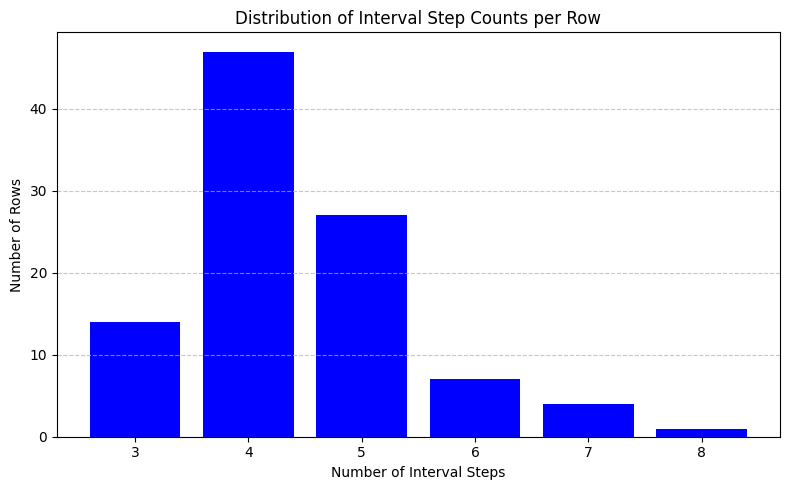

In [6]:
length_counts = df['Step Count'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(length_counts.index, length_counts.values, color='blue')
plt.xlabel('Number of Interval Steps')
plt.ylabel('Number of Rows')
plt.title('Distribution of Interval Step Counts per Row')
plt.xticks(length_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Add questions

In [7]:
df['Question'] = df.apply(format_question, axis=1)

#### Sort and save data

In [8]:
df = df[[
    'id',
    'Goal',
    'Plan',
    'Question',
    'Ground Truth',
]]

df = df.sort_values(by=['id'])

df.to_csv('../output_data/data-flow_analyses/interval_analysis.csv', index=False)

df

,id,Goal,Plan,Question,Ground Truth
6,1,"MEMORIAL HOSPITAL WEST (PEMBROKE PINES, FL) to...","[Drive northwest., Turn left after 19 meters o...",What is the time interval between performing S...,"[120, 147]"
13,2,"CLARITY CHILD GUIDANCE CENTER (SAN ANTONIO, TX...","[Drive west., Turn left onto Sid Katz Drive., ...",What is the time interval between performing S...,"[418, 510]"
46,11,"Tuscaloosa National Airport (TUSCALOOSA, AL) t...","[Drive northeast., Turn left after 136 meters ...",What is the time interval between performing S...,"[559, 682]"
53,12,"Independence Junior High School (Independence,...","[Drive north on North 9th Street., Turn right ...",What is the time interval between performing S...,"[313, 382]"
101,22,Grand Lodge and Library of the Ancient Free an...,"[Drive west., Turn right onto West 13th Street...",What is the time interval between performing S...,"[48, 59]"
...,...,...,...,...,...
2355,492,"Barthel Pigeonnier (Baton Rouge, LA) to New Or...","[Drive northeast on Iowa Street., Turn right o...",What is the time interval between performing S...,"[1996, 2440]"
2358,493,"CHESTER REGIONAL MEDICAL CENTER (CHESTER, SC) ...","[Drive west., Turn left onto Medical Park Driv...",What is the time interval between performing S...,"[148, 181]"
2369,495,"Dubuque Regional Airport (DUBUQUE, IA) to Wate...","[Drive north., Bear right after 1129 meters or...",What is the time interval between performing S...,"[1388, 1697]"
2379,497,"Headquarters House (Boston, MA) to BAYSTATE MA...","[Drive west on Beacon Street., Bear left towar...",What is the time interval between performing S...,"[119, 147]"
